<a href="https://colab.research.google.com/github/PasumurtySowmya/PythonAssignment/blob/main/T2assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import diamonds
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# importing diamond dataset from the library
df = sns.load_dataset('diamonds')
# Step1 Summarize of the dataset
print (df.describe())


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


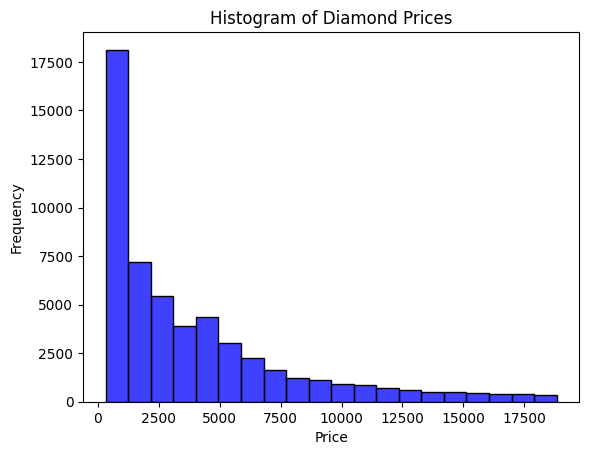

In [12]:
#2.Visualize distributions of numerical features of Histogram Plot
sns.histplot(data=df, x="price", bins=20, kde=False, color="blue")

# Set labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Diamond Prices")

# Show the plot
plt.show()

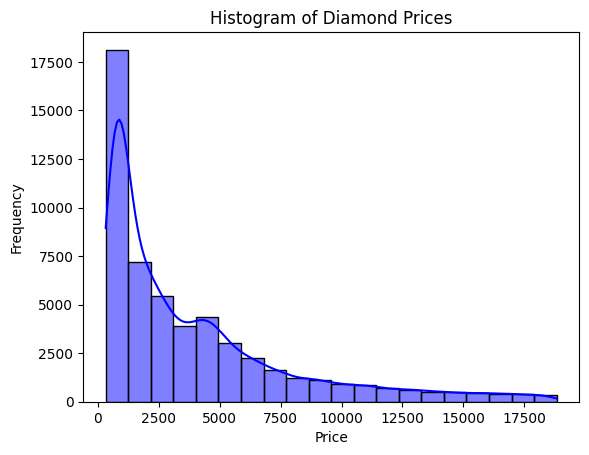

In [15]:
# Visualization of numerical features of Histogram and Density Plot
sns.histplot(data=df, x="price", bins=20, kde=True, color="blue")

# Set labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Diamond Prices")

# Show the plot
plt.show()


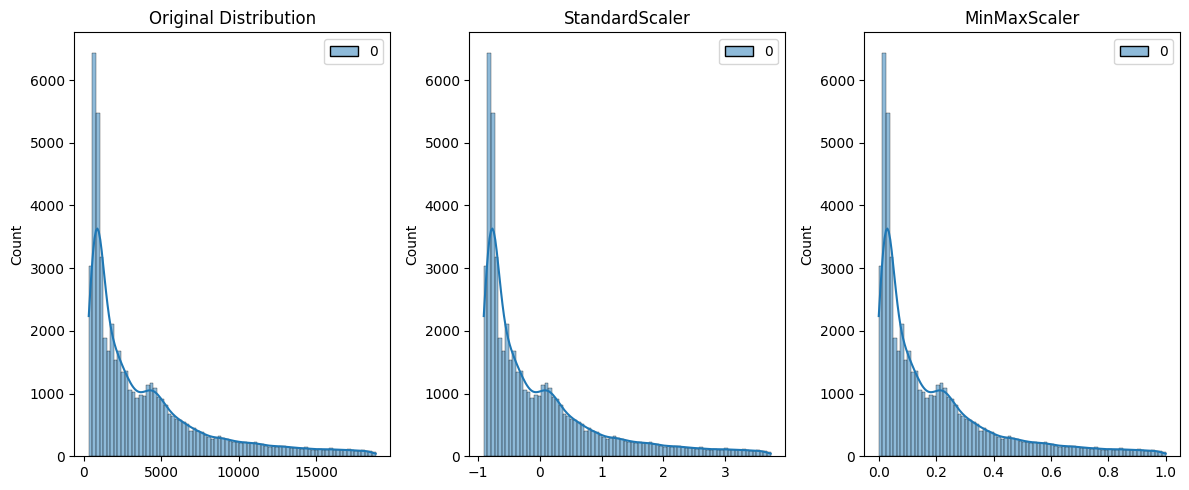

In [30]:
# 4.Comparing two scaling techniques Standard_scaler and min-max scaler
# Extract the "price" column for visualization
original_prices = df["price"].values.reshape(-1, 1)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scaling
scaled_prices_standard = standard_scaler.fit_transform(original_prices)
scaled_prices_minmax = minmax_scaler.fit_transform(original_prices)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(original_prices, kde=True)
plt.title("Original Distribution")

plt.subplot(1, 3, 2)
sns.histplot(scaled_prices_standard, kde=True)
plt.title("StandardScaler")

plt.subplot(1, 3, 3)
sns.histplot(scaled_prices_minmax, kde=True)
plt.title("MinMaxScaler")

plt.tight_layout()
plt.show()


LinAlgError: ignored

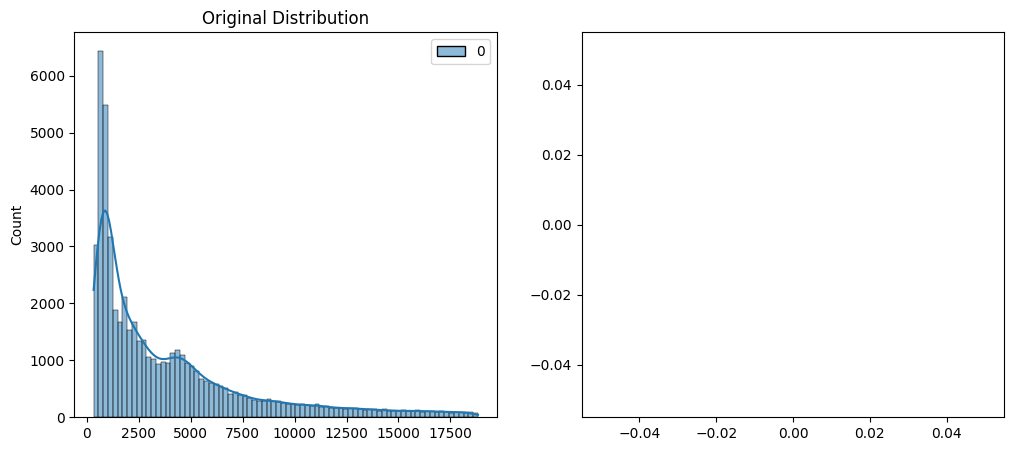

In [34]:
#Normalize the dataset using L2 normalization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Load the "diamonds" dataset from Seaborn
diamonds = sns.load_dataset("diamonds")

# Extract the "price" column for normalization
prices = diamonds["price"].values.reshape(-1, 1)
diamonds=df.dropna()
# Apply L2 normalization
normalized_prices = normalize(prices, norm="l2")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(prices, kde=True)
plt.title("Original Distribution")

plt.subplot(1, 2, 2)
sns.histplot(normalized_prices, kde=True)
plt.title("L2 Normalization")

plt.tight_layout()
plt.show()

